In [203]:
import numpy as np
import pandas as pd
import seaborn as sns

# Lottery + Daily + Streak

## Import Data

In [204]:
path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_2_processed_data/run_2/'

In [205]:
df = pd.read_csv(path + 'run2_earnings.csv')

In [206]:
df.head()

,Unique Identifier,ParticipantID,ParticipantIdentifier,Date,Type,Reward,Link to Subjects
0,recAtVoQNPg5gICzA,15d51e5f-b3c1-49cd-8767-a968a72ebc7f,1081454a-03ff-445c-9602-ac9fe9e3e5cf,1/30/2023,DailyAdherence,$0.00,NaN
1,recMwLQVjOHAxAtnb,5fd8605a-bdcf-4ea2-a561-94ccbf521a21,5431a81a-8b82-4b0b-a7ee-e13ebba665af,1/30/2023,DailyAdherence,$0.00,NaN
2,recYtSXH1X0JzIquk,65beb2f6-fc7a-4a8f-922f-d22f528cba5b,16c59234-ebc4-4cd7-b4cf-e105bcdb882c,1/30/2023,DailyAdherence,$0.00,NaN
3,recFucjGzlfVHRXxU,a2cb1a50-e2e8-4214-92c0-2778dc2f1ea4,aa94f196-94ac-4e0e-b66d-5e2c06f717b7,1/30/2023,DailyAdherence,$0.00,NaN
4,recv1ICD83d6x0z3l,937f387f-351d-4c11-8a59-eaf42ca463e9,42d753dd-c35f-42a6-8e3c-8d7e2f52a31a,1/30/2023,DailyAdherence,$0.00,NaN


## Process Data

### Select Participants

In [207]:
# select actual run 2 study participants
path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_1_raw_data/run_2/'

subjects = pd.read_csv(path + 'run2_subjects.csv')
subs = subjects.ParticipantIdentifier

# filter
df = df.loc[df.ParticipantIdentifier.isin(subs)]

### Clean/Format

In [208]:
# make Reward numeric
df['Reward'] = df['Reward'].replace('\$|,', '', regex=True)
df['Reward'] = pd.to_numeric(df['Reward'])

In [209]:
# sum rewards over categories and types
df = pd.DataFrame(df.groupby(['ParticipantIdentifier', 'Type'])['Reward'].sum()).reset_index()

In [210]:
# convert from long to wide
adherence = pd.pivot(df, index='ParticipantIdentifier', columns='Type', values='Reward').fillna(0).reset_index()

# note that this sort does not match the airtable sort method - so sort in temp airtable table
adherence.sort_values(by='ParticipantIdentifier')

Type,ParticipantIdentifier,DailyAdherence,Lottery,Streak
0,0151d9f1-1644-4437-805e-02f5e244a690,252.00,100.0,84.0
1,02f48bee-6e86-437c-9394-10ae57dadd14,235.80,0.0,63.0
2,042d7595-3fdc-4cf9-b288-c4b7961916d8,122.55,0.0,35.0
3,06af7782-cd70-4938-8e67-b6d98b34b665,222.00,0.0,56.0
4,075f7c4e-edea-4d64-8844-f046a1beb770,234.00,100.0,84.0
...,...,...,...,...
88,f8f71506-9382-40c7-99db-5c170b2a9abb,250.50,0.0,77.0
89,fb6c8f5a-f92d-4af8-9f87-73ffd4e21f98,221.55,0.0,56.0
90,fc490430-6a41-4853-a2cf-ae0b15265cb6,195.75,0.0,35.0
91,fee5cd07-329a-4f07-bb1a-913dfa09e3b4,246.00,100.0,77.0


# BART + n-Back

## Import Data

In [211]:
bnb = pd.read_csv('../../3_3_2_processed_data/run_2/run2_tasks.csv')

## Process Data

### Select Participants

In [212]:
# select actual run 2 study participants
# filter
bnb = bnb.loc[bnb.ParticipantIdentifier.isin(subs)]

In [213]:
bnb.head()

,ParticipantIdentifier,trial_date,task_motivation_time,task_motivation_level,task_gng_time,task_gng_incorrectNoGo,task_gng_incorrectGo,task_gng_correctGo,task_gng_correctNoGo,task_gng_avgRt,...,task_psat_avgRT,task_hanoi_solved,task_hanoi_time,task_hanoi_moves,task_rt_1,task_rt_2,task_rt_3,task_rt_4,task_spatialSpan_score,task_spatialSpan_time
0,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,2023-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,2023-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean/Format Data

In [214]:
# 0 bid actaully should be 5
bnb['task_nback_bid'] = bnb['task_nback_bid'].replace(0,5)

In [215]:
bnb.loc[bnb.task_nback_accuracy < .8, 'task_nback_bid'] = 0

In [216]:
# select bart
bart = bnb[['ParticipantIdentifier', 'trial_date', 'task_bart_score']]
# select nback
nback = bnb[['ParticipantIdentifier', 'trial_date', 'task_nback_bid']]

In [217]:
perf_tasks = bart.merge(nback, how='outer', on=['ParticipantIdentifier', 'trial_date'])

In [218]:
perf_tasks

,ParticipantIdentifier,trial_date,task_bart_score,task_nback_bid
0,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,2023-01-01,NaN,NaN
1,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,2023-01-02,NaN,NaN
2,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,2023-01-03,NaN,NaN
3,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,2023-01-04,NaN,NaN
4,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,2023-01-05,NaN,NaN
...,...,...,...,...
11155,b62d508b-4768-4dc4-9bf3-bc8f59bf2388,2023-04-26,NaN,NaN
11156,b62d508b-4768-4dc4-9bf3-bc8f59bf2388,2023-04-27,NaN,NaN
11157,b62d508b-4768-4dc4-9bf3-bc8f59bf2388,2023-04-28,NaN,NaN
11158,b62d508b-4768-4dc4-9bf3-bc8f59bf2388,2023-04-29,NaN,NaN


In [219]:
perf_tasks_sum = pd.DataFrame(perf_tasks.groupby(['ParticipantIdentifier'])[['task_nback_bid', 'task_bart_score']].sum()).reset_index()
perf_tasks_sum.head(5)

,ParticipantIdentifier,task_nback_bid,task_bart_score
0,0151d9f1-1644-4437-805e-02f5e244a690,4270.0,44360.0
1,02f48bee-6e86-437c-9394-10ae57dadd14,1722.0,37840.0
2,042d7595-3fdc-4cf9-b288-c4b7961916d8,1599.0,20620.0
3,06af7782-cd70-4938-8e67-b6d98b34b665,1927.0,47310.0
4,075f7c4e-edea-4d64-8844-f046a1beb770,3601.0,58420.0


### Convert to Dollars

In [220]:
amt_per_task = 1000

perf_tasks_sum['bart_earnings'] = (perf_tasks_sum.task_bart_score / perf_tasks_sum.task_bart_score.sum()) * amt_per_task
perf_tasks_sum['nback_earnings'] = (perf_tasks_sum.task_nback_bid / perf_tasks_sum.task_nback_bid.sum()) * amt_per_task

In [221]:
payment = perf_tasks_sum[['ParticipantIdentifier', 'bart_earnings', 'nback_earnings']]
payment[['bart_earnings', 'nback_earnings']] = payment[['bart_earnings', 'nback_earnings']].round(2)
payment.sample(6)

/var/folders/lw/ys_1b9sj08s904m4402qr0bm0000gn/T/ipykernel_7508/4139444380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment[['bart_earnings', 'nback_earnings']] = payment[['bart_earnings', 'nback_earnings']].round(2)


,ParticipantIdentifier,bart_earnings,nback_earnings
5,077803ce-0421-40c5-846d-40f0a9ac6a83,8.67,1.43
28,3e1d1276-0e73-4457-9911-f189b0ed0778,16.95,9.69
6,081555cf-aa19-4e1d-8b5a-223112ed0a35,14.99,29.05
74,c61e40df-fa64-4037-838e-65d912521dc2,1.59,0.52
44,64b148b2-590e-4f87-bcca-c7f633421fb3,10.74,29.06
16,1f9295fe-c2b8-4c5d-8b84-691ad031a74e,11.36,3.91


In [222]:
perf_tasks_sum.describe()

,task_nback_bid,task_bart_score,bart_earnings,nback_earnings
count,93.000000,93.000000,93.000000,93.000000
mean,1688.612903,40635.268817,10.752688,10.752688
std,1523.389292,15174.841152,4.015486,9.700583
min,25.000000,4350.000000,1.151074,0.159194
25%,582.000000,33540.000000,8.875176,3.706039
50%,1016.000000,41585.000000,11.004001,6.469648
75%,2588.000000,46390.000000,12.275474,16.479773
max,6195.000000,74555.000000,19.728347,39.448297


## Plot Data

In [160]:
sns.set_context(context='talk')

#### Totals

In [55]:
sns.histplot(data=perf_tasks_sum, x='task_spatialSpan_score').set(title='Total Spatial Span Scores');

ValueError: Could not interpret value `task_spatialSpan_score` for parameter `x`

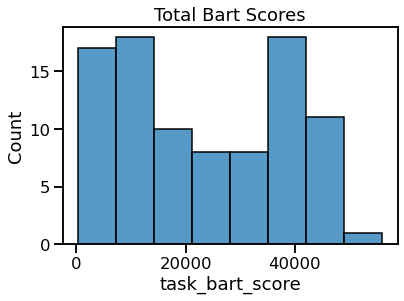

In [19]:
sns.histplot(data=perf_tasks_sum, x='task_bart_score').set(title='Total Bart Scores');

#### Averages

In [20]:
perf_tasks_summary = pd.DataFrame(perf_tasks.groupby(['ParticipantIdentifier']).agg({'task_spatialSpan_score': ['mean', 'std'], 'task_bart_score': ['mean', 'std']})).reset_index()
perf_tasks_summary.columns = ["_".join(a) for a in perf_tasks_summary.columns.to_flat_index()]
perf_tasks_summary.sample(5)

,ParticipantIdentifier_,task_spatialSpan_score_mean,task_spatialSpan_score_std,task_bart_score_mean,task_bart_score_std
46,76acef3c-d659-4fdd-b258-3668a1597584,407.098765,89.113215,570.185185,90.278889
57,a01397bb-a8a5-4cd1-af6f-6ace410f125d,454.074074,70.267841,528.703704,123.808768
23,39efadc3-7957-4b75-b560-d0d6c89cfe8b,409.722222,86.124179,501.862745,142.256672
32,596d1036-bafa-47c3-9886-a588a37789bb,391.075949,79.059661,513.354430,53.088711
41,6c1b2b3c-3c06-4238-830d-65b76904e8b5,436.824324,81.335490,560.135135,77.207127


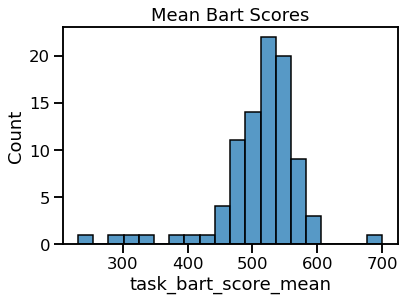

In [21]:
sns.histplot(data=perf_tasks_summary, x='task_bart_score_mean').set(title='Mean Bart Scores');

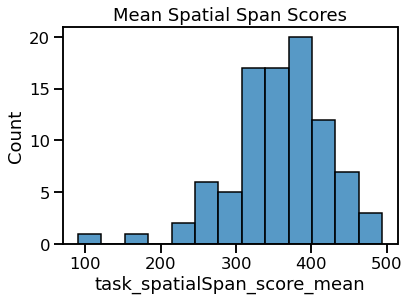

In [22]:
sns.histplot(data=perf_tasks_summary, x='task_spatialSpan_score_mean').set(title='Mean Spatial Span Scores');

#### Variance

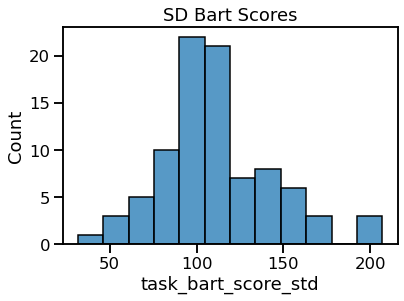

In [23]:
sns.histplot(data=perf_tasks_summary, x='task_bart_score_std').set(title='SD Bart Scores');

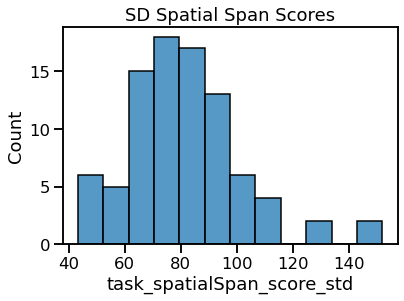

In [24]:
sns.histplot(data=perf_tasks_summary, x='task_spatialSpan_score_std').set(title='SD Spatial Span Scores');

#### Average vs. Variance

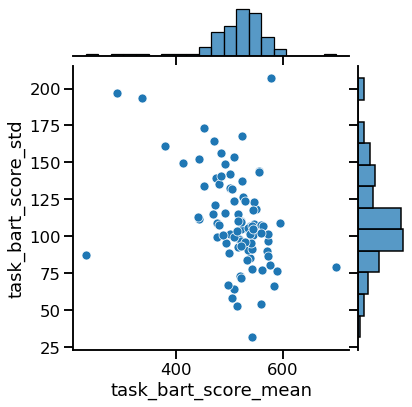

In [25]:
sns.jointplot(perf_tasks_summary, x="task_bart_score_mean", y="task_bart_score_std");

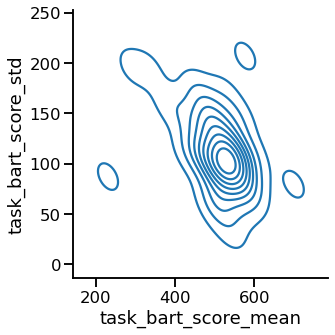

In [26]:
sns.displot(perf_tasks_summary, x="task_bart_score_mean", y="task_bart_score_std", kind='kde');

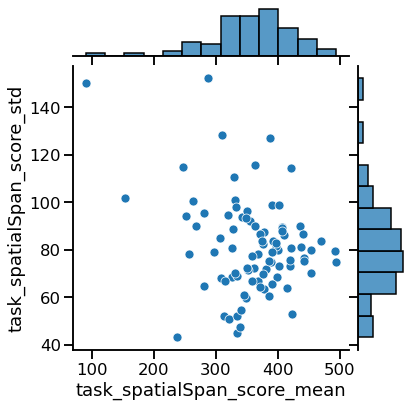

In [27]:
sns.jointplot(perf_tasks_summary, x="task_spatialSpan_score_mean", y="task_spatialSpan_score_std");

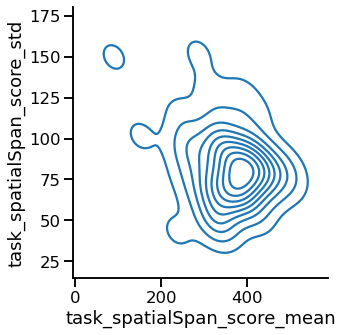

In [28]:
sns.displot(perf_tasks_summary, x="task_spatialSpan_score_mean", y="task_spatialSpan_score_std", kind='kde');

**QUESTION**

What would be the optimal strategy for BART - and what would be the variance/sd of that strategy?

# Qualtrics

## Import Data

In [234]:
# My data
qd_full = pd.read_csv('/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_1_raw_data/run_2/qualtrics/run2_qualtrics_offboarding.csv')

# Jacob data
qj_full = pd.read_csv('/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_1_raw_data/run_2/qualtrics/run2_jacob_offB.csv')

In [247]:
qd_full.loc[qd_full.consent_sonaID 1008491918]

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,time_swl_cantril,time_sec_work_ethic,time_grit_short,time_tipi,time_debrief,time_need_for_cognition,time_boredom_prone,time_ccs,time_ambition_scale_end,id


In [235]:
# get rid of extraneous rows
qd = qd_full.loc[2:,].reset_index(drop=True)
qj = qj_full.loc[2:,].reset_index(drop=True)

# select subjects who finished
qd = qd.loc[qd.Finished == '1',].reset_index(drop=True)
qj = qj.loc[qj.Finished == '1',].reset_index(drop=True)

In [236]:
# extract student number Daniel
qd = qd[['consent_sonaID']]
qd.rename(columns={'consent_sonaID': 'studentNumber'}, inplace=True)
# make numeric
qd['studentNumber'] = pd.to_numeric(qd.studentNumber)
qd['qualtrics'] = 1
qd = qd.drop_duplicates(subset=['studentNumber'], keep='last')
qd.head()

,studentNumber,qualtrics
0,1009149011,1
1,1009295610,1
2,1009158091,1
3,1009122334,1
4,1008784512,1


In [239]:
qd.sort_values('studentNumber')

,studentNumber,qualtrics
31,1058120,1
26,1006058132,1
21,1006740270,1
56,1007022687,1
45,1007143707,1
...,...,...
78,1009597303,1
5,1009613722,1
15,1009688866,1
73,1009724602,1


In [226]:
# extract student number Jacob
qj = qj[['subject']]
qj.rename(columns={'subject': 'studentNumber'}, inplace=True)
# make numeric
qj['studentNumber'] = pd.to_numeric(qj.studentNumber)
qj['jacob'] = 1
qj = qj.drop_duplicates(subset=['studentNumber'], keep='last')
qj.head()

,studentNumber,jacob
0,1009149011,1
1,1009295610,1
2,1009158091,1
3,1009122334,1
4,1008784512,1


## Process Data

In [227]:
subjects = subjects[['ParticipantIdentifier', 'Student Number']]
subjects.rename(columns={'Student Number': 'studentNumber'}, inplace=True)
subjects.head()

,ParticipantIdentifier,studentNumber
0,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,1006058132
1,852c24f8-36d6-4bbd-b79f-7f6fe64d1275,1006740270
2,35d11ffc-7034-4708-a086-cd4bd47b51fd,1007022687
3,081555cf-aa19-4e1d-8b5a-223112ed0a35,1007143707
4,ec83dfe2-3df1-44dc-a1ef-3a199327c229,1007161697


# Compile & Save

In [228]:
# Add qualtrics
df1 = subjects.merge(qd, how='left', on='studentNumber')
df2 = subjects.merge(qj, how='left', on='studentNumber')
df = df1.merge(df2, how='left', on=['ParticipantIdentifier', 'studentNumber'])
df.head()

,ParticipantIdentifier,studentNumber,qualtrics,jacob
0,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,1006058132,1.0,1.0
1,852c24f8-36d6-4bbd-b79f-7f6fe64d1275,1006740270,1.0,1.0
2,35d11ffc-7034-4708-a086-cd4bd47b51fd,1007022687,1.0,1.0
3,081555cf-aa19-4e1d-8b5a-223112ed0a35,1007143707,1.0,1.0
4,ec83dfe2-3df1-44dc-a1ef-3a199327c229,1007161697,NaN,NaN


In [229]:
# add tasks
df = df.merge(payment, how='left', on='ParticipantIdentifier')
df.head()

,ParticipantIdentifier,studentNumber,qualtrics,jacob,bart_earnings,nback_earnings
0,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,1006058132,1.0,1.0,9.10,2.81
1,852c24f8-36d6-4bbd-b79f-7f6fe64d1275,1006740270,1.0,1.0,10.69,38.16
2,35d11ffc-7034-4708-a086-cd4bd47b51fd,1007022687,1.0,1.0,10.90,39.45
3,081555cf-aa19-4e1d-8b5a-223112ed0a35,1007143707,1.0,1.0,14.99,29.05
4,ec83dfe2-3df1-44dc-a1ef-3a199327c229,1007161697,NaN,NaN,3.81,2.11


In [230]:
# add adherence
df = adherence.merge(df, how='left', on='ParticipantIdentifier')
df.head()

,ParticipantIdentifier,DailyAdherence,Lottery,Streak,studentNumber,qualtrics,jacob,bart_earnings,nback_earnings
0,0151d9f1-1644-4437-805e-02f5e244a690,252.00,100.0,84.0,1009409052,1.0,1.0,11.74,27.19
1,02f48bee-6e86-437c-9394-10ae57dadd14,235.80,0.0,63.0,1009122334,1.0,1.0,10.01,10.97
2,042d7595-3fdc-4cf9-b288-c4b7961916d8,122.55,0.0,35.0,1009028598,NaN,NaN,5.46,10.18
3,06af7782-cd70-4938-8e67-b6d98b34b665,222.00,0.0,56.0,1009077428,1.0,1.0,12.52,12.27
4,075f7c4e-edea-4d64-8844-f046a1beb770,234.00,100.0,84.0,1009008574,1.0,1.0,15.46,22.93


## Save

In [231]:
df.duplicated().sum()

0

In [232]:
df = df.drop_duplicates(keep='last')

In [233]:
save_path = '/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_3_experience_sampling/3_3_2_processed_data/run_2/'

df.to_csv(save_path + 'run2_addEarnings.csv', index=False)

In [84]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='bart_earnings', ylabel='nback_earnings'>

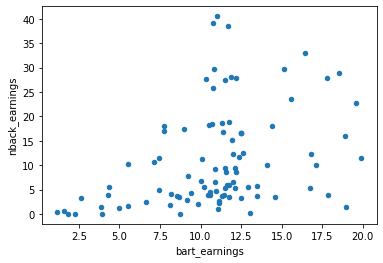

In [87]:
df.plot.scatter(x='bart_earnings', y='nback_earnings')

In [67]:
df.to_csv(save_path + 'run2_addEarnings.csv', index=False)